In [63]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


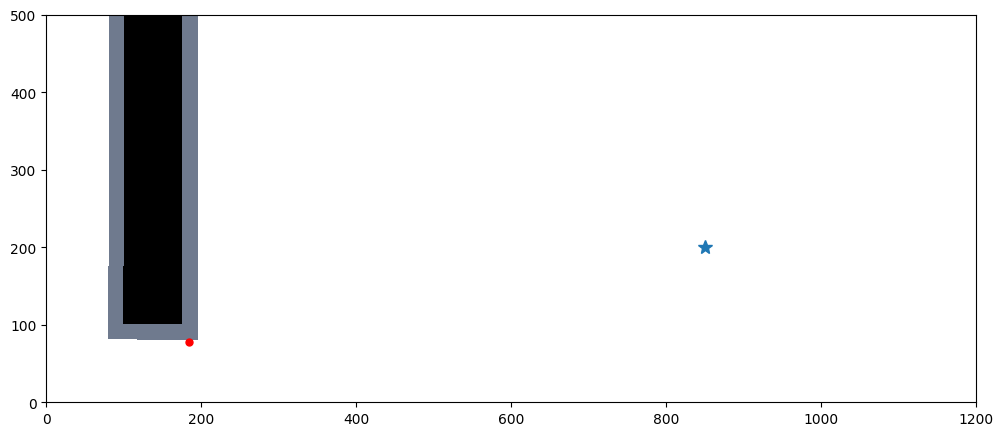

In [68]:
from a_star_Ji_Yichung_phase2 import Map, VisTree, Astar

# create map object
rr=20
custom_map = Map(inflate_radius=rr)

# define the corners of all the convex obstacles
obs_corners = []
obs_corners.append(custom_map.get_corners_rect(
                                        upper_left=(100,500),w=75,h=400))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(275,400),w=75,h=400))
# obs_corners.append(custom_map.get_corners_hex(
#                                         center=(650,250),radius=150))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(900,450),w=200,h=75))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(1020,375),w=80,h=250))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(900,125),w=200,h=75))

# add all obstacles to map
for c in obs_corners:
    custom_map.add_obstacle(corners_tuple=c)

# get the inflated obstacle corners
corners = custom_map.get_obstacle_corners_array(omit=[(3,2),
                                                        (4,1),
                                                        (4,2),
                                                        (5,1)],
                                            correction={(4,0):[0,-rr*2],
                                            (4,3):[0,rr*2]})

# # ask user for init and goal position
# init_coord,init_ori = ask_for_coord(custom_map, mode="initial")
# goal_coord,goal_ori = ask_for_coord(custom_map, mode="goal")
    
init_coord = (184.28331150002504, 77.5)
init_ori = 1.0471975511965976
goal_coord = (850,200)
# goal_ori = -90

vt = VisTree(corners=corners,goal_coord=goal_coord,
            boundary=custom_map.obstacle_boundary_inflate,
            inflate_coef=1.0)

# create Astar solver
a = Astar(init_coord=init_coord,
            init_ori=init_ori,
            goal_coord=goal_coord,
            rpms=[0.5,1.0],
            map=custom_map,
            vis_tree=vt,
            savevid=False,
            dt=20.0
            )


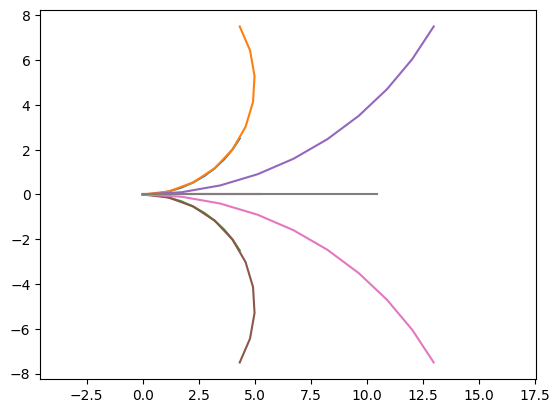

In [69]:
import matplotlib.pyplot as plt
from a_star_Ji_Yichung_phase2 import Action

plt.figure()
for action in a.actions:
    action:Action
    plt_pts = action.get_plot_pts(init_pose=(0,0,0))
    plt.plot(plt_pts[:,0],plt_pts[:,1])
plt.axis('equal')
plt.show()

In [70]:
a.run(step=True)

======= New closed node: =======
(184.28331150002504, 77.5) 1.0471975511965976
checking: (0.0, 0.2617993877991494), True
checking: (0.0, 0.5235987755982988), True
checking: (0.2617993877991494, 0.0), False
checking: (0.2617993877991494, 0.5235987755982988), True
checking: (0.5235987755982988, 0.0), True
checking: (0.5235987755982988, 0.2617993877991494), True


In [37]:
a.open_list

In [12]:
for s in a.open_list:
    print(s.cost_to_come,s.estimated_cost, s.parent_action.v_l, s.parent_action.v_r)

3.9269908169872414 1158.5456953678192 0.0 0.7853981633974483
3.9269908169872414 1158.6201231130676 0.7853981633974483 0.7853981633974483
3.9269908169872414 1159.4584308644437 0.7853981633974483 0.0
7.853981633974483 1158.8254618755936 1.5707963267948966 1.5707963267948966
11.780972450961723 1158.7798798782696 0.7853981633974483 1.5707963267948966
7.853981633974483 1163.2262774434414 1.5707963267948966 0.0
11.780972450961723 1161.7198327207682 1.5707963267948966 0.7853981633974483
7.853981633974483 1160.0679463256486 0.0 1.5707963267948966


## Test obstacle checking

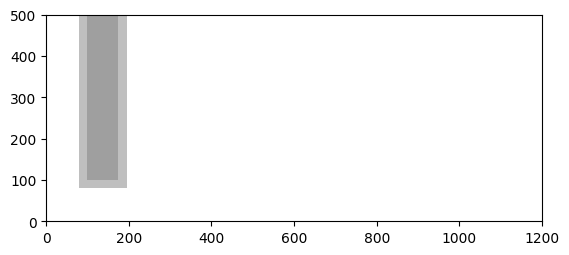

In [87]:
# create map object
rr=20
custom_map = Map(inflate_radius=rr)

# define the corners of all the convex obstacles
obs_corners = []
obs_corners.append(custom_map.get_corners_rect(
                                        upper_left=(100,500),w=75,h=400))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(275,400),w=75,h=400))
# obs_corners.append(custom_map.get_corners_hex(
#                                         center=(650,250),radius=150))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(900,450),w=200,h=75))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(1020,375),w=80,h=250))
# obs_corners.append(custom_map.get_corners_rect(
#                                         upper_left=(900,125),w=200,h=75))

# add all obstacles to map
for c in obs_corners:
    custom_map.add_obstacle(corners_tuple=c)

plt.figure()
custom_map.plot()
plt.show()

In [76]:
custom_map.obstacle_corners_inflate

[array([[ 80, 500],
        [195, 500],
        [195,  80],
        [ 80,  80]])]

(184.28331150002504, 82.5, 2.0943951023931953)
0.0 0.2617993877991494
True


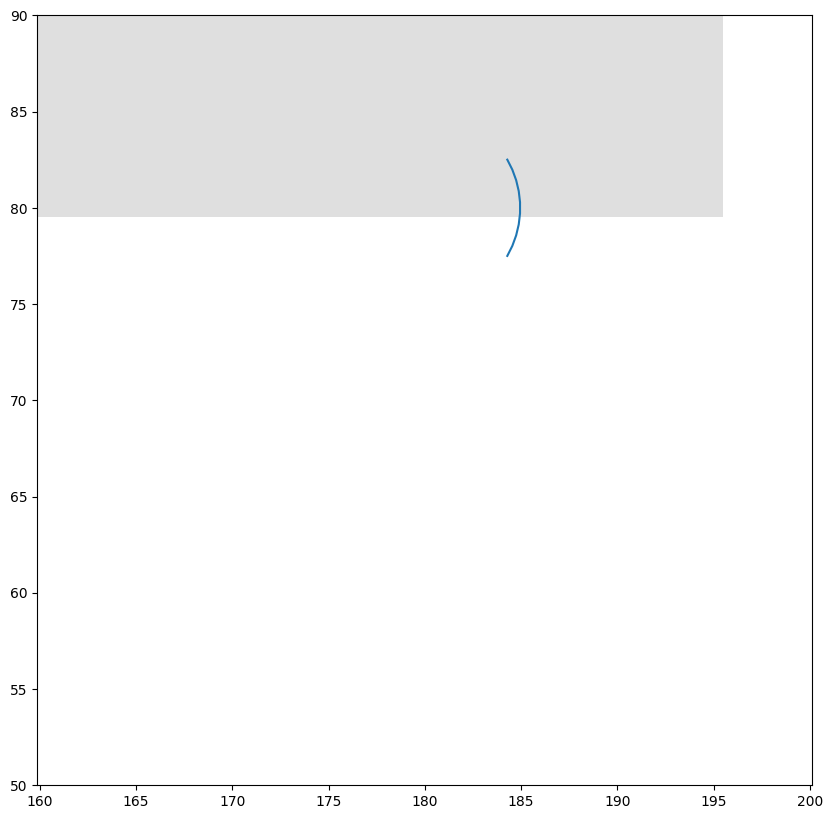

(179.95318448110285, 85.0, 3.141592653589793)
0.0 0.5235987755982988
True


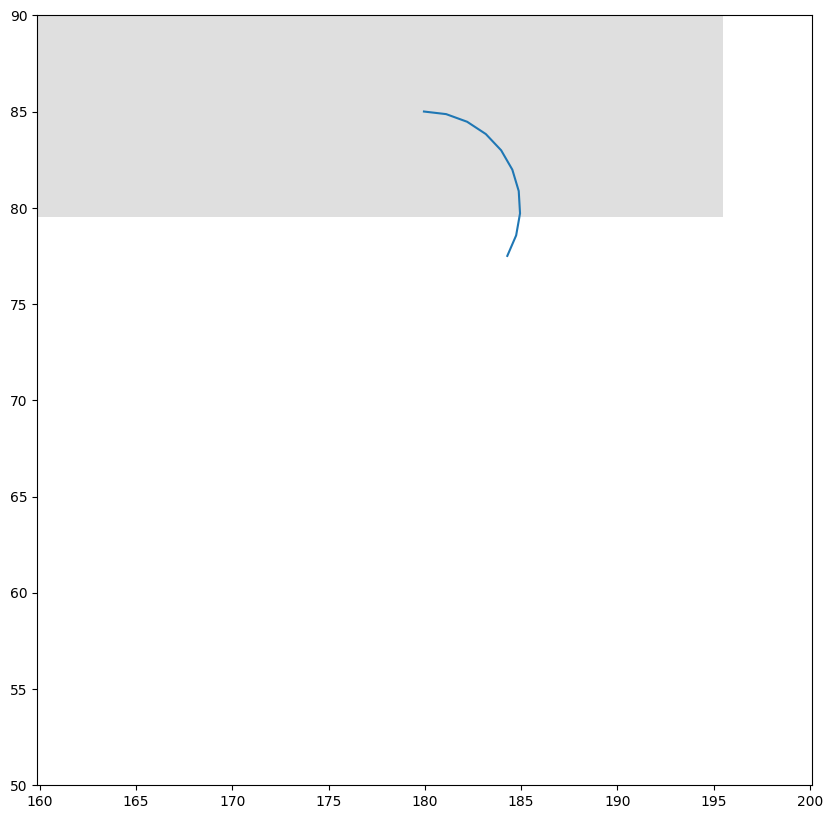

(188.61343851894722, 80.0, 0.0)
0.2617993877991494 0.0
False


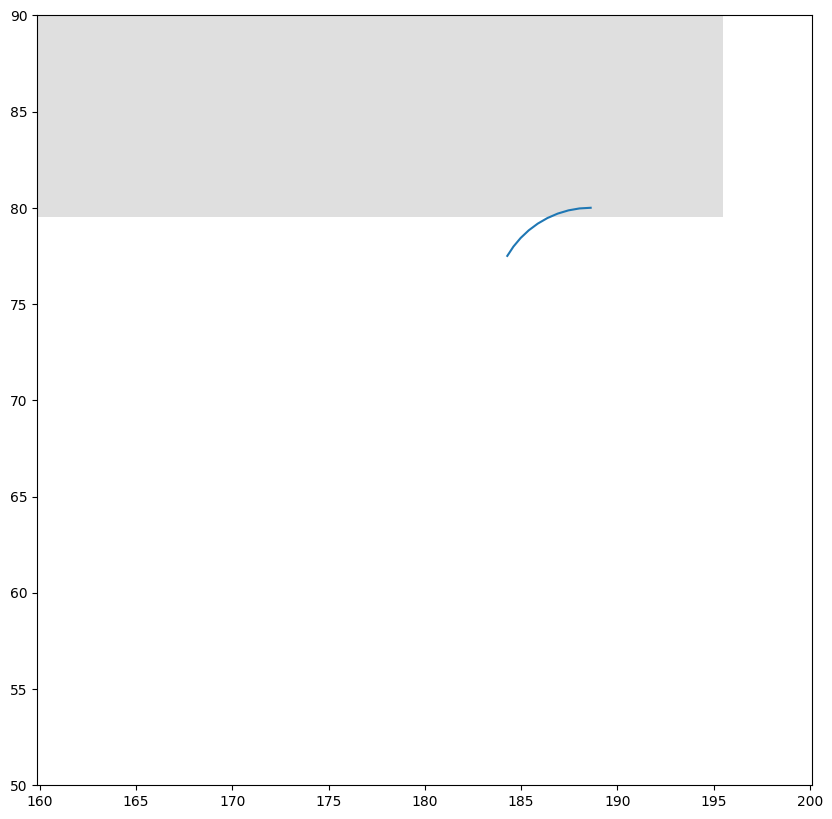

(186.90130537801653, 82.03449841058554, 1.0471975511965976)
(184.28331150002504, 92.5, 2.0943951023931953)
0.2617993877991494 0.5235987755982988
True


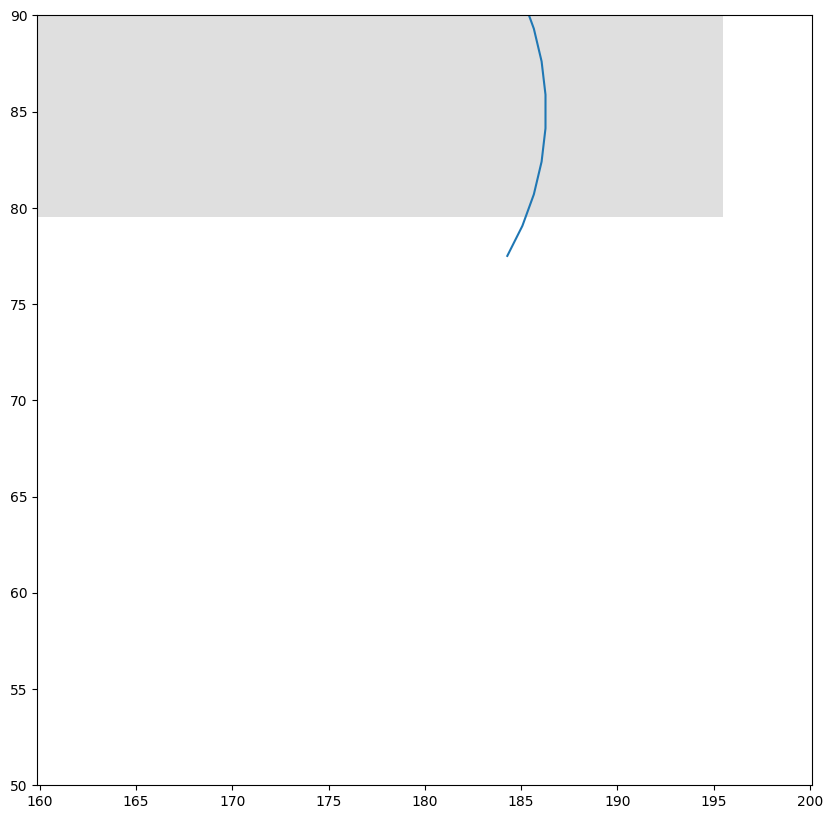

(192.94356553786943, 77.5, 5.235987755982989)
0.5235987755982988 0.0
True


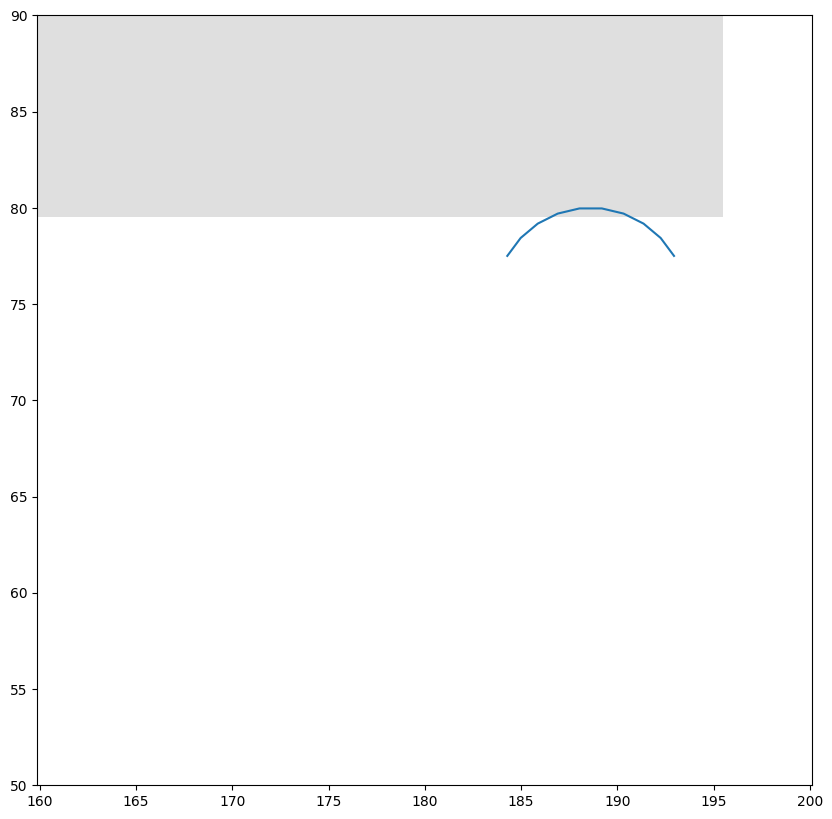

(197.27369255679162, 85.0, 0.0)
0.5235987755982988 0.2617993877991494
True


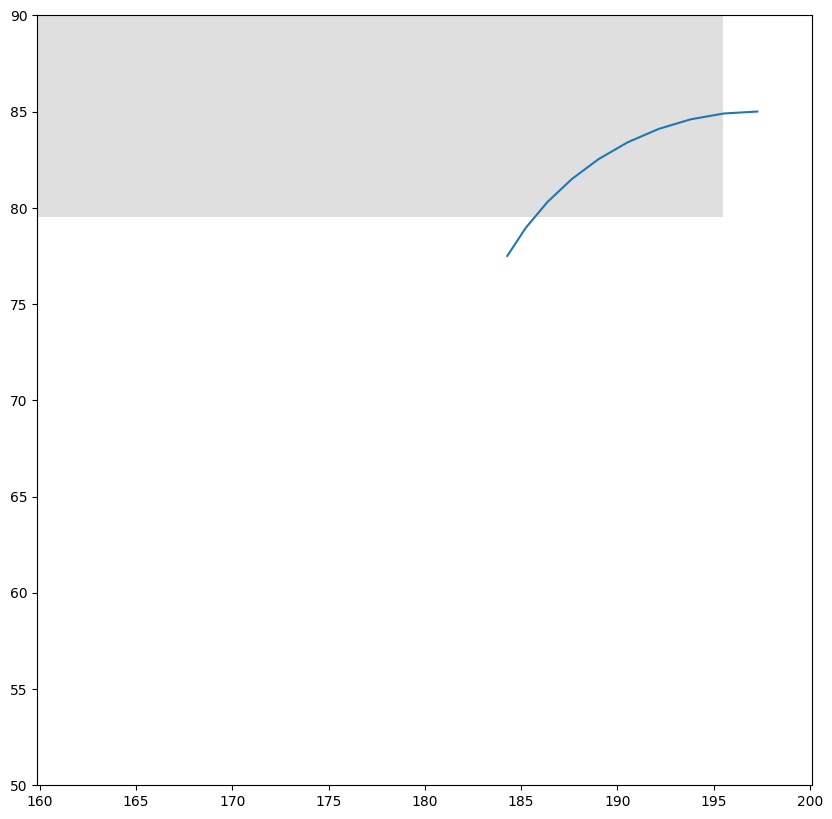

(189.51929925600803, 86.56899682117108, 1.0471975511965976)


In [72]:
curr_pose = (184.28331150002504, 77.5 ,1.0471975511965976)

for action in a.actions:
    next_pose, center_rot, cost = action.apply(curr_pose)
    print(next_pose)
    if center_rot is None:
        continue
    print(action.v_l, action.v_r)
    result = custom_map.check_obstacle_curve(curr_pose=curr_pose,
                                            action=action,
                                            center_rot=center_rot,
                                            )
    print(result)

    plt_pts = action.get_plot_pts(curr_pose)
    plt.figure(figsize=(10,10))
    custom_map.plot(show=False)
    plt.plot(plt_pts[:,0],plt_pts[:,1])
    plt.axis("equal")
    plt.xlim([160,200])
    plt.ylim([50,90])
    
    plt.show()

In [62]:
2/np.pi*180

114.59155902616465

In [23]:
next_pose, center_rot, cost = action.apply(curr_pose)
custom_map.check_obstacle_curve(curr_pose=curr_pose,action=action,
                                center_rot=center_rot,pool=None)

TypeError: cannot unpack non-iterable NoneType object